In [1]:
### Merge everything with sequel queries

### Create copy
df = loans.copy()

### Merge accounts
df = df.merge(accounts, how='left', on="account_id")
df = df.rename(columns={"date_x": "loan_date", "date_y" : "account_date"})

### Merge Districts 
distrs = districts.rename(columns={"code ": "district_id"})
df = df.merge(distrs, how='left', on="district_id")

### Merge Clients
# clts = clients.drop(columns=['district_id'])
df = df.merge(clients, how='left', on=["district_id"])

## Merge transactions
trans2 = trans.rename(columns={"type": "trans_type" , "amount":"trans_ammount"})
df = df.merge(trans2, how='left', on="account_id")

# ### Merge Disp
# ### Mover para cleanup
# q1 = "SELECT * FROM disp WHERE Type='OWNER'"
# disp = ps.sqldf(q1)
# df = df.merge(disp, how='left', on="account_id")


# df.columns
# df.isnull().sum()

# ### Merge Card
# ## TODO: Rename issue column to date_something
# card = card.rename(columns={"type": "type_card"})
# df = df.merge(card, how='left', on="disp_id")

### Merge

NameError: name 'loans' is not defined

In [28]:
import numpy as np

def normalize(df):

    return (df-df.min())/(df.max()-df.min())

def full_norm(df):
    columns = df.columns
    
    for column in columns:
        try:
            if not np.array_equal(df[column], df[column].astype(int)):
                utils.normalization(df,column)
            break
        except ValueError:
            utils.normalization(df,column)
    
    return df
            
      


            

In [35]:
f = utils.normalization(clients,"gender")
# f = utils.normalization(f,"birth_number")
f
# normalize(f)

# f2 =normalize(f)

dfff = full_normalization(df)

dfff



,loan_id,account_id,loan_date,amount,duration,payments,status,district_id,frequency,account_date,...,no. of commited crimes '95,no. of commited crimes '96,crime_growth,total_crime,trans_id,date,trans_type,operation,trans_ammount,balance
0,38,38,50,134,0,287,0,28,2,207,...,37,32,13,36,1653,915,0,2,2293,45
1,38,38,50,134,0,287,0,28,2,207,...,37,32,13,36,1654,876,0,2,2066,1035
2,39,39,108,201,2,186,1,42,1,115,...,35,28,8,29,1657,1213,0,2,3247,868
3,39,39,108,201,2,186,1,42,1,115,...,35,28,8,29,1671,639,0,2,2099,2405
4,39,39,108,201,2,186,1,42,1,115,...,35,28,8,29,1655,683,0,2,2510,6670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17788,327,327,246,170,1,209,1,63,1,133,...,39,37,14,39,14323,264,1,3,705,10510
17789,327,327,246,170,1,209,1,63,1,133,...,39,37,14,39,14356,311,1,4,2653,5407
17790,327,327,246,170,1,209,1,63,1,133,...,39,37,14,39,14313,311,1,3,1804,5218
17791,327,327,246,170,1,209,1,63,1,133,...,39,37,14,39,14303,356,1,3,207,5184


In [232]:
### Full Normalization

cp = df.copy()
ct2 = clients.copy()

features = ['loan_id', 'loan_date', 'amount', 'duration', 'payments',
       'status', 'frequency', 'account_date', 'type', 'birth_number', 'gender', 'name ', 'region',
       'no. of inhabitants', 'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       "unemploymant rate '95 ", "unemploymant rate '96 ",
       'unemploymant_growth', 'no. of enterpreneurs per 1000 inhabitants ',
       "no. of commited crimes '95 ", "no. of commited crimes '96 ",
       'crime_growth', 'total_crime', 'date', 'trans_type',
       'operation', 'trans_ammount', 'balance']

categorical = ['type','gender', 'name ', 'region',
               'trans_type', 'operation','frequency']

df2 = pd.get_dummies(cp,columns=categorical)
df2


,loan_id,account_id,loan_date,amount,duration,payments,status,district_id,account_date,disp_id,...,trans_type_withdrawal,trans_type_withdrawal in cash,operation_collection from another bank,operation_credit card withdrawal,operation_credit in cash,operation_remittance to another bank,operation_withdrawal in cash,frequency_issuance after transaction,frequency_monthly issuance,frequency_weekly issuance
0,5314,1787,05-07-1993,96396,12,8033,-1,30,22-03-1993,2166,...,0,0,0,0,1,0,0,0,0,1
1,5314,1787,05-07-1993,96396,12,8033,-1,30,22-03-1993,2166,...,0,0,0,0,1,0,0,0,0,1
2,5316,1801,11-07-1993,165960,36,4610,1,46,13-02-1993,2181,...,0,0,0,0,1,0,0,0,1,0
3,5316,1801,11-07-1993,165960,36,4610,1,46,13-02-1993,2181,...,0,0,0,0,1,0,0,0,1,0
4,5316,1801,11-07-1993,165960,36,4610,1,46,13-02-1993,2181,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17788,7308,11362,27-12-1996,129408,24,5392,1,67,14-10-1995,13663,...,1,0,0,0,0,1,0,0,1,0
17789,7308,11362,27-12-1996,129408,24,5392,1,67,14-10-1995,13663,...,1,0,0,0,0,0,1,0,1,0
17790,7308,11362,27-12-1996,129408,24,5392,1,67,14-10-1995,13663,...,1,0,0,0,0,1,0,0,1,0
17791,7308,11362,27-12-1996,129408,24,5392,1,67,14-10-1995,13663,...,1,0,0,0,0,1,0,0,1,0


In [33]:
def full_normalization(df):
    
    cp = df.copy()
    columns = cp.columns

    for column in columns:
        if(cp[column].dtypes != 'int64' or cp[column].dtypes != 'float64' or  cp[column].dtypes != 'int32' or  cp[column].dtypes != 'float32'):
            cp = utils.normalization(cp,column)

    normalize(cp)
    return cp

In [102]:
### Logistic Regression

df2 = df.copy()
# df2 = df2.drop('type_OWNER',axis=1)

### Data splitting into X & y
# df2 = utils.normalization(df2,"status")
# df2 = utils.normalization(df2,"date")
# df2 = utils.normalization(df2,"account_date")
# df2 = utils.normalization(df2,"birth_number")
# df2 = utils.normalization(df2,"loan_date")

df2 = dfff.copy()


df2 = df2.drop(columns=['account_id','district_id','disp_id','client_id',])

df2= df2.drop(columns=['account_date','birth_number'])
print(df2.columns)
X = df2.drop('status',axis=1)

y = df2['status'] 

X.shape 
y.shape
 
df2.head()

Index(['loan_id', 'loan_date', 'amount', 'duration', 'payments', 'status',
       'frequency', 'type', 'gender', 'name ', 'region', 'no. of inhabitants',
       'no. of municipalities with inhabitants < 499 ',
       'no. of municipalities with inhabitants 500-1999',
       'no. of municipalities with inhabitants 2000-9999 ',
       'no. of municipalities with inhabitants >10000 ', 'no. of cities ',
       'ratio of urban inhabitants ', 'average salary ',
       'unemploymant rate '95 ', 'unemploymant rate '96 ',
       'unemploymant_growth', 'no. of enterpreneurs per 1000 inhabitants ',
       'no. of commited crimes '95 ', 'no. of commited crimes '96 ',
       'crime_growth', 'total_crime', 'trans_id', 'date', 'trans_type',
       'operation', 'trans_ammount', 'balance'],
      dtype='object')


,loan_id,loan_date,amount,duration,payments,status,frequency,type,gender,name,...,no. of commited crimes '95,no. of commited crimes '96,crime_growth,total_crime,trans_id,date,trans_type,operation,trans_ammount,balance
0,38,50,134,0,287,0,2,0,0,57,...,37,32,13,36,1653,915,0,2,2293,45
1,38,50,134,0,287,0,2,0,0,57,...,37,32,13,36,1654,876,0,2,2066,1035
2,39,108,201,2,186,1,1,0,1,35,...,35,28,8,29,1657,1213,0,2,3247,868
3,39,108,201,2,186,1,1,0,1,35,...,35,28,8,29,1671,639,0,2,2099,2405
4,39,108,201,2,186,1,1,0,1,35,...,35,28,8,29,1655,683,0,2,2510,6670


In [ ]:
## Sampling

In [103]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
tree.fit(X,y)

fi_col = []
fi = []

for i,column in enumerate(df2.drop('status',axis=1)):
    print(f'feature importance {column} {tree.feature_importances_[i]}')
    
    fi_col.append(column)
    fi.append(tree.feature_importances_[i])
    
    

feature importance loan_id 0.15851890982610112
feature importance loan_date 0.13697504625775878
feature importance amount 0.04484771758534285
feature importance duration 0.028752356698746
feature importance payments 0.17515549314497608
feature importance frequency 0.0360445832311564
feature importance type 0.0
feature importance gender 0.0
feature importance name  0.07682443448171299
feature importance region 0.0
feature importance no. of inhabitants 0.007784472195987302
feature importance no. of municipalities with inhabitants < 499  0.023836969619436515
feature importance no. of municipalities with inhabitants 500-1999 0.022300895096334098
feature importance no. of municipalities with inhabitants 2000-9999  0.0058456729643429715
feature importance no. of municipalities with inhabitants >10000  0.0
feature importance no. of cities  0.03807761417673206
feature importance ratio of urban inhabitants  0.03167647035508562
feature importance average salary  0.015461677144347648
feature impo

In [105]:
from sklearn.feature_selection import SelectKBest, chi2

X2 = X

print(X2.shape)
X2_new = SelectKBest(chi2, k=20).fit_transform(X2, y)
print(X2_new.shape)


(17793, 32)
(17793, 20)


In [106]:
fi_df = zip(fi_col,fi)
fi_df = pd.DataFrame(fi_df,columns=['feature','feature_importance'])

fi_df.sort_values('feature_importance',ascending=False).reset_index()

top20 = fi_df['feature'][1:21]
top20

1                                             loan_date
2                                                amount
3                                              duration
4                                              payments
5                                             frequency
6                                                  type
7                                                gender
8                                                 name 
9                                                region
10                                   no. of inhabitants
11        no. of municipalities with inhabitants < 499 
12      no. of municipalities with inhabitants 500-1999
13    no. of municipalities with inhabitants 2000-9999 
14       no. of municipalities with inhabitants >10000 
15                                       no. of cities 
16                          ratio of urban inhabitants 
17                                      average salary 
18                               unemploymant ra

In [107]:
df2[top20].shape
X = df2[top20].values
X

print(X.shape)
print(y.shape)

(17793, 20)
(17793,)


In [108]:
from sklearn.model_selection import train_test_split
### First split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2, random_state=15)
### Second split
# X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train,train_size=0.9,test_size=0.1, random_state=15)

print(X_train.shape)
print(y_train.shape)
# print(X_valid.shape)
# print(y_valid.shape)



(14234, 20)
(14234,)


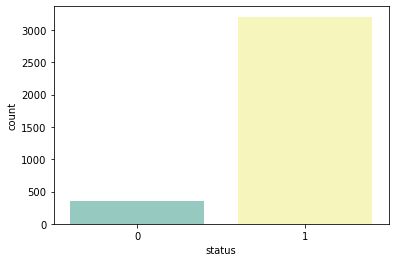

In [109]:
import seaborn as sns

ax = sns.countplot(x=y_test,palette="Set3")

In [110]:
from sklearn.linear_model import LogisticRegression

### Training the model
log_reg = LogisticRegression(random_state=10,solver='lbfgs',max_iter=200).fit(X_train,y_train)
log_reg

C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(max_iter=200, random_state=10)

In [111]:

### Predicting the class labels
y_pred = log_reg.predict(X_train)

### Probability estimations
pred_probabilities = log_reg.predict_proba(X_train)

### Coeficient
log_reg.coef_

print(y_pred)
print(pred_probabilities)
print(log_reg.coef_)


[1 1 1 ... 1 1 1]
[[0.14561711 0.85438289]
 [0.28825939 0.71174061]
 [0.03829058 0.96170942]
 ...
 [0.02304393 0.97695607]
 [0.03745723 0.96254277]
 [0.029932   0.970068  ]]
[[ 8.75593926e-04 -9.22413628e-03  1.61190309e-01 -3.00164856e-04
   4.71144296e-01  0.00000000e+00  2.34928114e-01  2.24202727e-02
  -2.46376592e-02  3.74741461e-02 -7.90253193e-04  4.27831918e-03
  -7.05223786e-02 -7.84342713e-02  1.23110263e-01 -4.74556423e-02
   1.97767519e-02  2.53481880e-01 -2.78338848e-01  7.71006074e-02]]


In [91]:
from sklearn.metrics import classification_report

### Evaluating the model

### Accuracy on train
train_score = log_reg.score(X_train,y_train)

### Accuracy on test
test_score = log_reg.score(X_test,y_test)


### Classification Report
report = classification_report(y_train,y_pred)

print(train_score)
print(test_score)
print(report)


0.9034003091190108
0.9067153694858107
              precision    recall  f1-score   support

           0       1.00      0.08      0.14      1488
           1       0.90      1.00      0.95     12746

    accuracy                           0.90     14234
   macro avg       0.95      0.54      0.54     14234
weighted avg       0.91      0.90      0.86     14234



In [92]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,classes=None,title='COnfusion Matrix'):
    if classes is not None:
        sns.heatmap(cm,xticklabels=classes,yticklabels=classes,vmin=0,vmax=1,annot=True,annot_kws={'size':50})
    else:
        sns.heatmap(cm,vmin=0,vmax=1)

    plt.title=title
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    

        

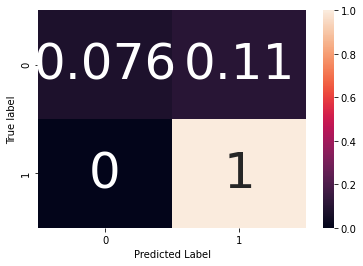

In [93]:
from sklearn.metrics import confusion_matrix
### Visualize confusion matrix
cm = confusion_matrix(y_train,y_pred)
cm

cm_norm = cm / cm.sum(axis=1)

cm_norm

plot_confusion_matrix(cm_norm,classes=log_reg.classes_)


In [212]:
import numpy as np
### analysis

fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)

print(fp)
print(fn)
print(tp)
print(tn)

[  25 1488]
[1488   25]
[    0 12721]
[12721     0]


In [223]:
import numpy as np
from sklearn import metrics
# import matplotlib.pyplot as plt

### AUC

def auc(y= np.array([1, 1, 2, 2]),pred=np.array([0.1, 0.4, 0.35, 0.8])):

    fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    
    auc()

In [129]:
### Logistic Regression from scratch
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Normalize the df
df2 = full_normalization(df)

### Drop some tables
df2 = df2.drop(columns=['account_id','district_id','disp_id','client_id',])
df2= df2.drop(columns=['account_date','birth_number'])

### Create X and y variables
X = df2.drop('status',axis=1)
y = df2['status'] 

### Applying the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=15,criterion='entropy',max_depth=10)
tree.fit(X,y)

### Select the 15 best attributtes
X2 = SelectKBest(chi2, k=15).fit_transform(X, y)

### Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X2,y,train_size=0.8,test_size=0.2, random_state=15)

### Training the model (Apply the logistical regression)
log_reg = LogisticRegression(random_state=15,solver='lbfgs',max_iter=100).fit(X_train,y_train)



C:\Users\Hugo\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [124]:
### Predictions

### Predicting the class labels
y_pred = log_reg.predict(X_train)

### Probability estimations
pred_probabilities = log_reg.predict_proba(X_train)

### Coeficient
log_reg.coef_

print(y_pred)
print(pred_probabilities)
print(log_reg.coef_)

[1 0 1 ... 1 1 1]
[[0.41499382 0.58500618]
 [0.52686093 0.47313907]
 [0.08854266 0.91145734]
 ...
 [0.04854793 0.95145207]
 [0.01551707 0.98448293]
 [0.0136483  0.9863517 ]]
[[ 3.35959700e-03 -4.73223022e-04 -3.99399855e-03 -4.14074590e-03
   2.72380521e-02  1.47145151e-02  1.07431278e-02  2.36634477e-02
   7.24295475e-03 -9.78532139e-04  7.14340300e-03  1.30523320e-05
  -2.87332472e-04 -4.25378888e-05  5.84678444e-05]]
